In [1]:
import rebound, os
print(rebound.__build__)
import numpy as np
import warnings,glob
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    %matplotlib inline
    import matplotlib.pyplot as plt

Jan 30 2017 13:35:37


In [7]:
if not os.path.isfile("janus_init.bin"):
    sim = rebound.Simulation()
    sim.add(["Sun","Mercury","Venus","Earth","Mars","Jupiter","Saturn","Uranus","Neptune"])
    sim.save("janus_init.bin")
sim = rebound.Simulation.from_file("janus_init.bin")
sim.move_to_com()
sim.integrator = "janus"
sim.ri_janus.integrator = 1
sim.ri_janus.scale = 1e20
sim.dt = 0.08/365.25*2.*np.pi
#sim.getWidget()

In [8]:
N = 100
times = np.logspace(-1,3,N)
E0 = sim.calculate_energy()
energy = np.zeros((N))

In [9]:
for i,t in enumerate(times):
    sim.integrate(t,exact_finish_time=0)
    energy[i] = np.abs((sim.calculate_energy()-E0)/E0)

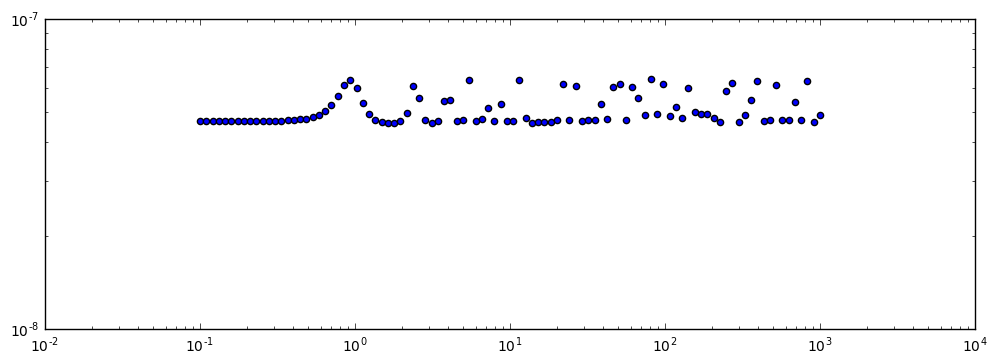

In [10]:
fig = plt.figure(figsize=(12, 4)) 
ax = plt.subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")
ax.scatter(times, energy);

In [6]:
print(sim.dt, np.max(energy))

0.0001376193907116679 6.32049262514e-10


In [11]:
print(sim.dt, np.max(energy))

0.0013761939071166786 6.377292313e-08


In [24]:
print(sim.dt, np.max(energy))

0.013761939071166787 0.000134276365823


In [29]:
print(sim.dt, np.max(energy))

0.13761939071166787 0.0017090878559


In [6]:
print(sim.dt, np.max(energy))

0.13761939071166787 0.000754789365949


In [11]:
print(sim.dt, np.max(energy))

0.013761939071166787 6.92097785244e-05


In [16]:
print(sim.dt, np.max(energy))

0.0013761939071166786 6.96943293986e-06


In [21]:
print(sim.dt, np.max(energy))

0.0001376193907116679 6.97630353875e-07
